In [17]:
using Catlab.CategoricalAlgebra.CSets
using Catlab.Present, Catlab.Graphics, Catlab.Graphs

# Firt make a graph schema to see what's going on

@present SchemaGraph(FreeSchema) begin
  V::Ob
  E::Ob
  src::Hom(E,V)
  tgt::Hom(E,V)
end

Presentation{Schema,Symbol}(Catlab.Theories.FreeSchema, (Ob = Catlab.Theories.FreeSchema.Ob{:generator}[V, E], Hom = Catlab.Theories.FreeSchema.Hom{:generator}[src, tgt], Data = Catlab.Theories.FreeSchema.Data{:generator}[], Attr = Catlab.Theories.FreeSchema.Attr{:generator}[]), Dict(:src => (:Hom => 1),:V => (:Ob => 1),:E => (:Ob => 2),:tgt => (:Hom => 2)), Pair[])

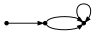

In [18]:
# Make a graph over that schema
g = Graph()
add_parts!(g, :V, 3)
add_parts!(g, :E, 4, src=[1,2,2,3], tgt=[2,3,3,3])
to_graphviz(g)

In [19]:
# Shema for the (two state) Ising model 
@present SchemaIsingModel(FreeSchema) begin
  V1::Ob
  V2::Ob
  E::Ob
  L1::Ob
  L2::Ob
  src1::Hom(L1,V1)
  tgt1::Hom(L1,V1)
  src2::Hom(L2,V2)
  tgt2::Hom(L2,V2)
  p::Hom(E, V1)
  q::Hom(E, V2)
  
end


Presentation{Schema,Symbol}(Catlab.Theories.FreeSchema, (Ob = Catlab.Theories.FreeSchema.Ob{:generator}[V1, V2, E, L1, L2], Hom = Catlab.Theories.FreeSchema.Hom{:generator}[src1, tgt1, src2, tgt2, p, q], Data = Catlab.Theories.FreeSchema.Data{:generator}[], Attr = Catlab.Theories.FreeSchema.Attr{:generator}[]), Dict(:V1 => (:Ob => 1),:V2 => (:Ob => 2),:p => (:Hom => 5),:L2 => (:Ob => 5),:L1 => (:Ob => 4),:tgt1 => (:Hom => 2),:E => (:Ob => 3),:src2 => (:Hom => 3),:q => (:Hom => 6),:tgt2 => (:Hom => 4)…), Pair[])

In [4]:
# Make it into a type??
const IsingModel = ACSetType(SchemaIsingModel, index=index=[ :src1,:tgt1,:src2,:tgt2]) # creates RoadMap type

Catlab.CSetDataStructures.AttributedCSet{Catlab.Theories.CatDesc{(:V1, :V2, :E, :L1, :L2),(:src1, :tgt1, :src2, :tgt2, :p, :q),(4, 4, 5, 5, 3, 3),(1, 1, 2, 2, 1, 2)},Catlab.Theories.AttrDesc{Catlab.Theories.CatDesc{(:V1, :V2, :E, :L1, :L2),(:src1, :tgt1, :src2, :tgt2, :p, :q),(4, 4, 5, 5, 3, 3),(1, 1, 2, 2, 1, 2)},(),(),(),()},Tuple{},(:src1, :src2, :tgt1, :tgt2),(),Tables,Indices} where Indices<:NamedTuple where Tables<:NamedTuple

In [32]:
# Create an instance of that schema
i = IsingModel()
add_parts!(i, :V1, 3)
add_parts!(i, :V2, 1)
add_parts!(i, :E, 2, p=[1,3], q=[1,1])
add_parts!(i, :L1, 2, src1=[1,2], tgt1=[2,3])
add_parts!(i, :L2, 0, src1=[0], tgt1=[0])

print(i)

CSet(
  V1 = 1:3,
  V2 = 1:1,
  E = 1:2,
  L1 = 1:2,
  L2 = 1:0,
  src1 : L1 → V1 = [1, 2],
  tgt1 : L1 → V1 = [2, 3],
  src2 : L2 → V2 = Int64[],
  tgt2 : L2 → V2 = Int64[],
  p : E → V1 = [1, 3],
  q : E → V2 = [1, 1])

In [33]:
j = IsingModel()

CSet with elements V1 = 1:0, V2 = 1:0, E = 1:0, L1 = 1:0, L2 = 1:0

In [34]:

add_part!(i, :L1; src1=0, tgt1=1)
print(i)

CSet(
  V1 = 1:3,
  V2 = 1:1,
  E = 1:2,
  L1 = 1:3,
  L2 = 1:0,
  src1 : L1 → V1 = [1, 2, 0],
  tgt1 : L1 → V1 = [2, 3, 1],
  src2 : L2 → V2 = Int64[],
  tgt2 : L2 → V2 = Int64[],
  p : E → V1 = [1, 3],
  q : E → V2 = [1, 1])

In [8]:
src1(g::CSet, e) = subpart(g, e, :src1)

g[e,:src1]

""" Target vertex (vertices) of edges(s) in a graph.
"""
tgt1(g::CSet, e) = subpart(g, e, :tgt1)

LoadError: [91mUndefVarError: e not defined[39m

In [13]:
print(j)

CSet(
  V1 = 1:0,
  V2 = 1:0,
  E = 1:0,
  L1 = 1:0,
  L2 = 1:0,
  src1 : L1 → V1 = Int64[],
  tgt1 : L1 → V1 = Int64[],
  src2 : L2 → V2 = Int64[],
  tgt2 : L2 → V2 = Int64[],
  p : E → V1 = Int64[],
  q : E → V2 = Int64[])

In [16]:
for e in parts(i, :L1)
    add_part!(g, :E, src=i[e,:src1], tgt=i[e,:tgt1])
end
  
print(g)

CSet(
  V = 1:3,
  E = 1:7,
  src : E → V = [1, 2, 2, 3, 1, 2, 0],
  tgt : E → V = [2, 3, 3, 3, 2, 3, 1])

In [21]:
include("/Users/amyjade/Documents/ACT2021/code/Graphviz.jl")

using Catlab.CategoricalAlgebra.CSets
using Catlab.Present, Catlab.Graphics, Catlab.Graphs, Catlab.Theories

using StaticArrays: StaticVector, SVector

In [22]:
default_node_attrs(show_labels::Bool) = Dict(
  :shape => show_labels ? "circle" : "point",
  :width => "0.05",
  :height => "0.05",
  :margin => "0",
)


default_node_attrs (generic function with 1 method)

In [60]:
using Catlab.CSetDataStructures

function to_graphviz_ising(g::IsingModel;
    prog::AbstractString="dot", graph_attrs::AbstractDict=Dict(),
    node_attrs::AbstractDict=Dict(), edge_attrs::AbstractDict=Dict(),
    node_labels::Bool=false, edge_labels::Bool=false,
    show_reflexive::Bool=true)
  pg = PropertyGraph{Any}(; prog = prog,
    graph = graph_attrs,
    node = merge!(default_node_attrs(node_labels), node_attrs),
    edge = merge!(Dict(:arrowsize => "0.5"), edge_attrs),
  )
  for v1 in parts(g, :V1)
    add_vertex!(pg, label=node_labels ? string(v1) : "")
  end
  for v2 in parts(g, :V2)
    add_vertex!(pg, label=node_labels ? string(v1) : "")
  end

  #Assume all edges are reflexive
  is_reflexive = false
  for e in parts(g, :E)
      e′ = add_edge!(pg, g[e,:p], g[e,:q])
      if is_reflexive; set_eprop!(pg, e′, :style, "dashed") end
      if edge_labels; set_eprop!(pg, e′, :label, string(e)) end
  end
  for e in parts(g, :L1)
      e′ = add_edge!(pg, g[e,:src1], g[e,:tgt1])
      if is_reflexive; set_eprop!(pg, e′, :style, "dashed") end
      if edge_labels; set_eprop!(g, e′, :label, string(e)) end
  end
  for e in parts(g, :L2)
      e′ = add_edge!(pg, g[e,:src2], g[e,:tgt2])
      if is_reflexive; set_eprop!(pg, e′, :style, "dashed") end
      if edge_labels; set_eprop!(g, e′, :label, string(e)) end
  end

  to_graphviz(pg)
end



to_graphviz_ising (generic function with 1 method)

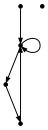

In [61]:
to_graphviz_ising(i)